In [1]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [2]:
data_dir = Path.cwd().parent / "Data"

contacts = data_dir / "Volunteer Augmented Data" / "ContactsCWK2.csv"

df = pd.read_csv(contacts)

In [3]:
cols = [
    "Speaks.English",
    "Speaks.Arabic",
    "Speaks.Amazigh",
    "Speaks.French",
    "Age",
    "Currently.Studying",
    "Current.Institution.Type",
    "X..of.Days.Since.Graduation",
    "Mailing.City",
    "MailingState",
    "Number.Days.Until.Job.Placement",
    "Retained.Job.as.of.last.Status.Check",
    "Number.Days.Retained.Job",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "At.Grad.Job.Placement",
    "At.Grad.Placement.Data.Available",
    "X3.Month.Job.Placement",
    "X3.Month.Placement.Data.Available",
    "X6.Month.Job.Placement",
    "X6.Month.Placement.Data.Available",
    "X9.Month.Job.Placement",
    "X9.Month.Placement.Data.Available",
    "X12.Month.Job.Placement",
    "X12.Month.Placement.Data.Available",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Number.Family.Members",
    "Number.Family.Members.Working",
    "Monthly.Family.Income",
    "Job.Tenure.in.Months..First.",
    "First.Previous.Job.Salary",
    "Job.Tenure.in.Months..Second.",
    "Second.Previous.Job.Salary",
    "Job.Tenure.in.Months..Third.",
    "Third.Previous.Job.Salary",
    "Lives.in.IDP.camp.or.shelter.",
    "NumApps",
    "Grad170days",
    "Retain6mo",
    "working6mo",
    "CohortDK",
    "MailingState.1",
]


In [4]:
drop = [
    "Retained.Job.as.of.last.Status.Check",
    "Number.Days.Retained.Job",
    "Continuously.Working",
    "X..Of.Days.Continuously.Working",
    "At.Grad.Job.Placement",
    "At.Grad.Placement.Data.Available",
    "X3.Month.Job.Placement",
    "X3.Month.Placement.Data.Available",
    "X6.Month.Job.Placement",
    "X6.Month.Placement.Data.Available",
    "X9.Month.Job.Placement",
    "X9.Month.Placement.Data.Available",
    "X12.Month.Job.Placement",
    "X12.Month.Placement.Data.Available",
    "X3.Month.Job.Retention",
    "X3.Month.Continuously.Working",
    "X3.Month.Post.Placement.Data.Avail.YES",
    "X6.Month.Job.Retention",
    "X6.Month.Continuously.Working",
    "X6.Month.Post.Placement.Data.Avail.YES",
    "X9.Month.Job.Retention",
    "X9.Month.Continuously.Working",
    "X9.Month.Post.Placement.Data.Avail.YES",
    "X12.Month.Job.Retention",
    "X12.Month.Continuously.Working",
    "X12.Month.Post.Placement.Data.Avail.YES",
    "Job.Tenure.in.Months..First.",
    "Job.Tenure.in.Months..Second.",
    "Job.Tenure.in.Months..Third.",
    "Retain6mo",
    "working6mo",
]


In [5]:
X = df.drop(drop, axis=1)

In [6]:
X = X.select_dtypes(np.number)

In [7]:
X = X.dropna(axis=1)

In [8]:
X = X.iloc[:, 2:]

In [9]:
X.isna().sum()

Speaks.English                 0
Speaks.Arabic                  0
Speaks.Amazigh                 0
Speaks.French                  0
Age                            0
Currently.Studying             0
X..of.Days.Since.Graduation    0
NumApps                        0
Grad170days                    0
dtype: int64

In [10]:
df = pd.concat([X, df["Retain6mo"]], axis=1)

In [11]:
df = df.dropna()

In [12]:
df.head()

,Speaks.English,Speaks.Arabic,Speaks.Amazigh,Speaks.French,Age,Currently.Studying,X..of.Days.Since.Graduation,NumApps,Grad170days,Retain6mo
0,1,1,0,1,22,0,517,1,1,0.0
1,0,1,0,1,29,0,278,1,1,1.0
2,0,1,0,1,26,0,516,1,1,0.0
3,0,1,0,0,23,0,595,1,1,0.0
4,0,1,0,1,26,0,278,1,1,1.0


In [13]:
y = df["Retain6mo"]

In [14]:
X = df.drop("Retain6mo", axis=1)

In [33]:
dt = DecisionTreeClassifier(max_depth=2)

In [34]:
y.value_counts()

0.0    1500
1.0    1429
Name: Retain6mo, dtype: int64

In [35]:
dt.fit(X, y)

DecisionTreeClassifier(max_depth=2)

In [36]:
plt.rcParams['figure.dpi'] = 300

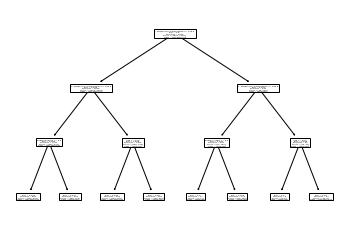

In [19]:
plot_tree(dt, feature_names=X.columns, class_names=["Not Retained", "Retained"]);

In [27]:
plt.rcParams['figure.dpi'] = 600

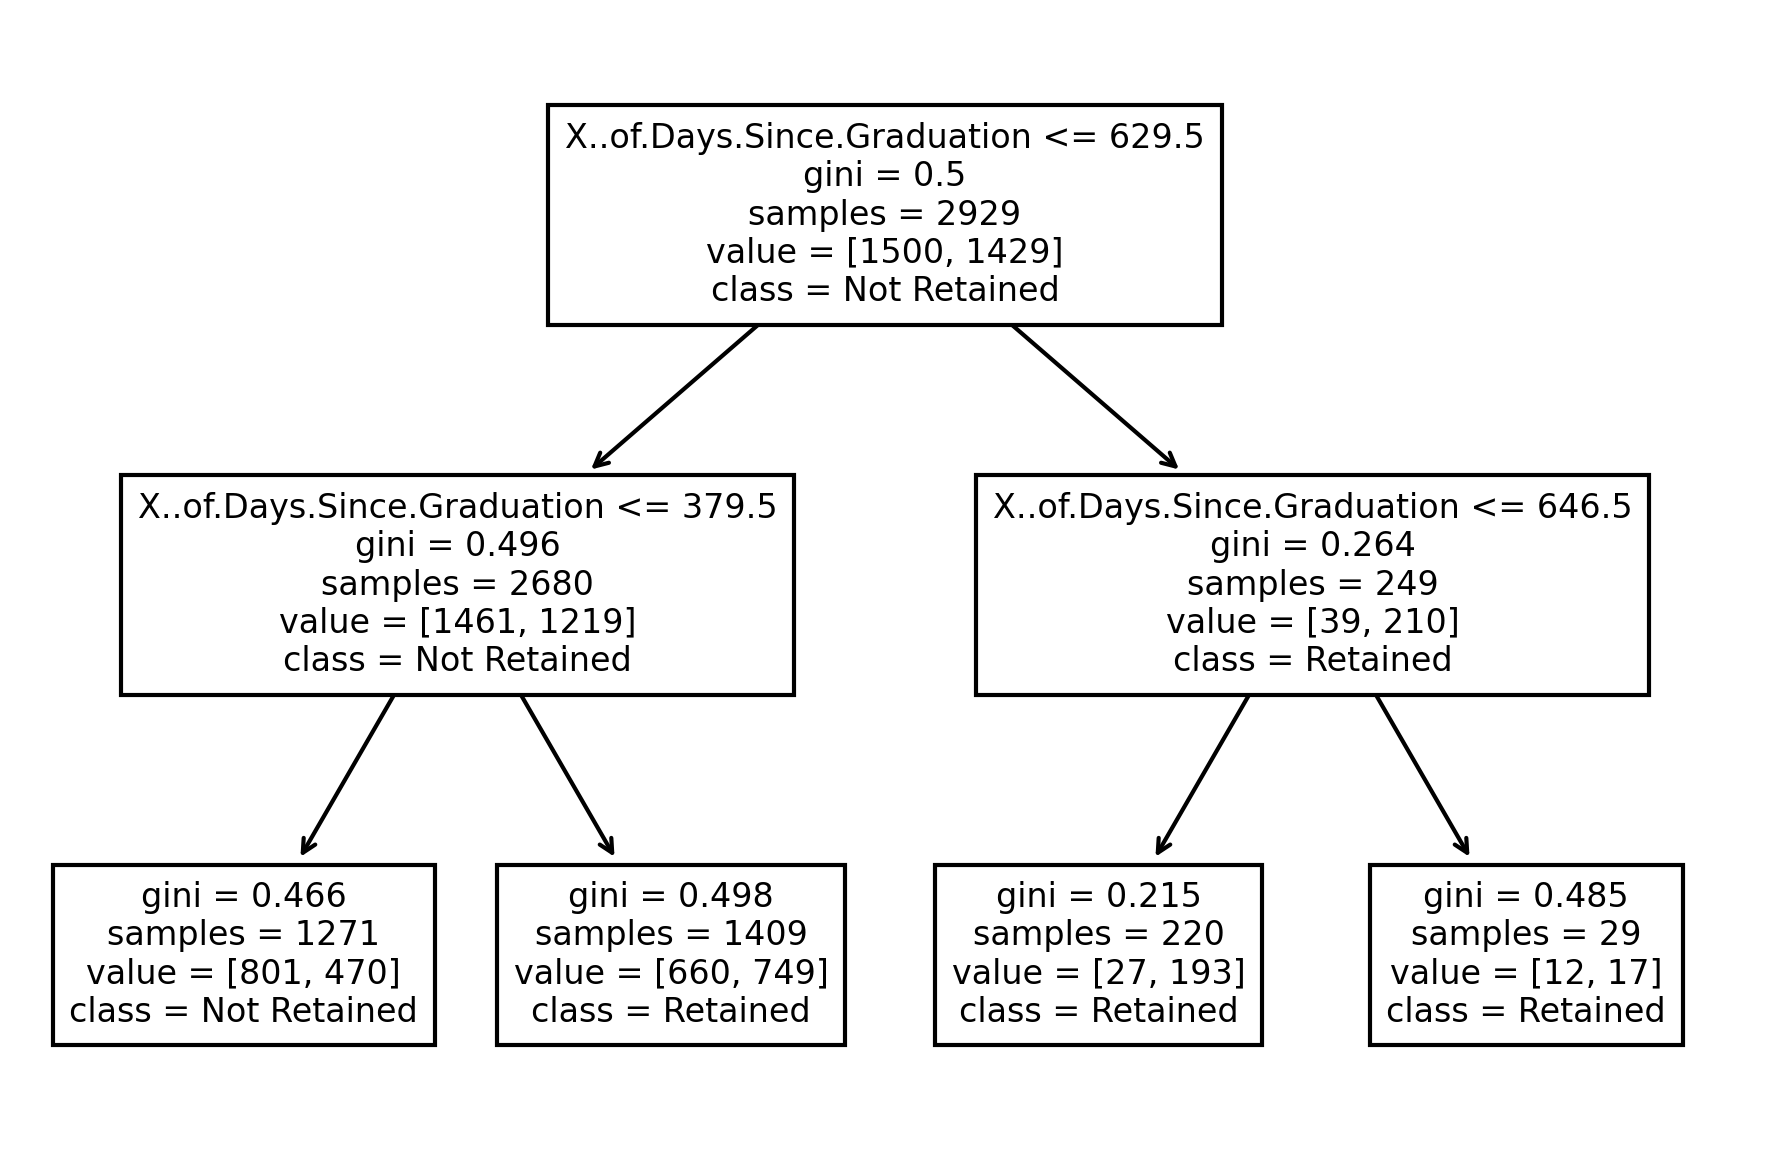

In [37]:
plot_tree(dt, feature_names=X.columns, class_names=["Not Retained", "Retained"], fontsize=8);
plt.tight_layout()